**1. Installing necesaary libraries**

In [1]:
!pip install pandas matplotlib seaborn plotly

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

**2. Load Dataset**

In [2]:
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**3. Data Cleaning & Preperation**

In [4]:
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['listed_in'] = df['listed_in'].fillna('')
df['country'] = df['country'].fillna('Unknown')

**A) Content type count**

<Axes: xlabel='type', ylabel='count'>

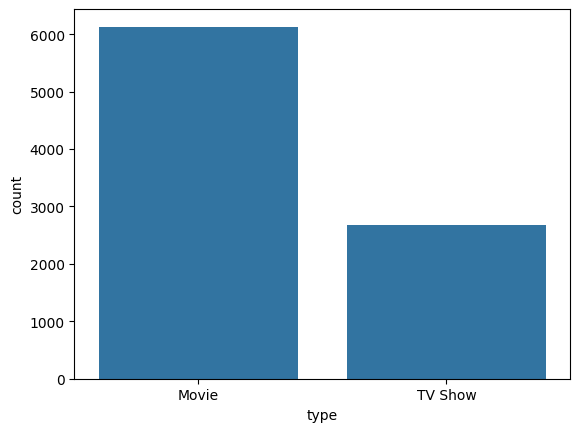

In [5]:
sns.countplot(x='type', data=df)

**B) Content Added Over Years**

<Axes: xlabel='year_added'>

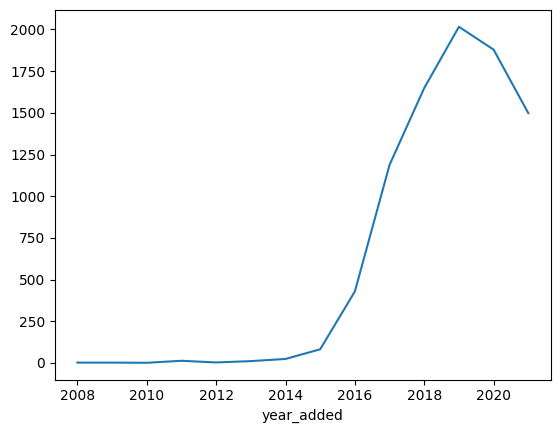

In [6]:
df.groupby('year_added').count()['show_id'].plot()

C) Top genres

<Axes: xlabel='Count', ylabel='Genre'>

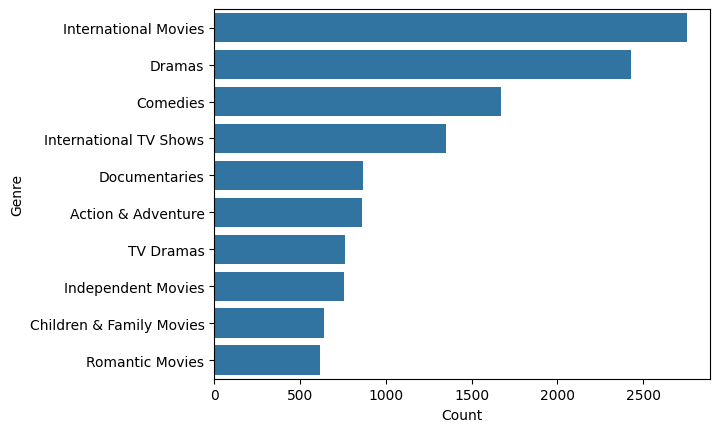

In [7]:
from collections import Counter
genre_list = ','.join(df['listed_in']).split(',')
genre_count = Counter([g.strip() for g in genre_list])
top_genres = pd.DataFrame(genre_count.most_common(10), columns=['Genre', 'Count'])
sns.barplot(x='Count', y='Genre', data=top_genres)

**4. Cleaned File**

In [8]:
df.to_csv("netflix_cleaned.csv", index=False)